> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

**Read the dataset**

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**Display datset information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10866.0,6.606418e+04,9.213014e+04,5.000000,10596.250000,20669.000000,7.561000e+04,4.178590e+05
popularity,10866.0,6.464410e-01,1.000185e+00,0.000065,0.207583,0.383856,7.138170e-01,3.298576e+01
budget,10866.0,1.462570e+07,3.091321e+07,0.000000,0.000000,0.000000,1.500000e+07,4.250000e+08
revenue,10866.0,3.982332e+07,1.170035e+08,0.000000,0.000000,0.000000,2.400000e+07,2.781506e+09
runtime,10866.0,1.020709e+02,3.138141e+01,0.000000,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,10866.0,2.173897e+02,5.756191e+02,10.000000,17.000000,38.000000,1.457500e+02,9.767000e+03
vote_average,10866.0,5.974922e+00,9.351418e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,10866.0,2.001323e+03,1.281294e+01,1960.000000,1995.000000,2006.000000,2.011000e+03,2.015000e+03
budget_adj,10866.0,1.755104e+07,3.430616e+07,0.000000,0.000000,0.000000,2.085325e+07,4.250000e+08
revenue_adj,10866.0,5.136436e+07,1.446325e+08,0.000000,0.000000,0.000000,3.369710e+07,2.827124e+09


**Discover nulls in my dataset**

In [6]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**Discover duplicated rows**

In [7]:
df.duplicated().sum()

1

**Display values in each column**

In [8]:
df.cast.value_counts()

Louis C.K.                                                                  6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei     5
Bill Burr                                                                   4
Chris Wedge                                                                 3
Pierre Coffin                                                               3
                                                                           ..
Timothy Bottoms|Jeff Bridges|Cybill Shepherd|Ben Johnson|Cloris Leachman    1
Zachary Levi|Mandy Moore|Donna Murphy|Ron Perlman|M.C. Gainey               1
Paul Walker|Vin Diesel|Michelle Rodriguez|Jordana Brewster|Rick Yune        1
Mia Wasikowska|Adam Driver|Emma Booth|Jessica Tovey|Lily Pearl              1
Saif Ali Khan|Akshaye Khanna|Bipasha Basu|Katrina Kaif|Anil Kapoor          1
Name: cast, Length: 10719, dtype: int64

In [9]:
df.genres.value_counts()

Drama                                     712
Comedy                                    712
Documentary                               312
Drama|Romance                             289
Comedy|Drama                              280
                                         ... 
Action|Adventure|War|Thriller               1
Thriller|Drama|Horror|Fantasy               1
TV Movie|Fantasy|Comedy|Romance|Family      1
Drama|Science Fiction|Adventure             1
History|Drama|Music                         1
Name: genres, Length: 2039, dtype: int64

**Know movies that have runtime 0 that is a wrong data**

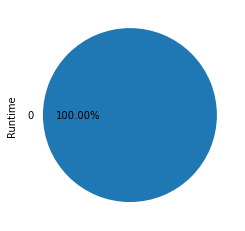

In [10]:
df.runtime.sort_values()[:10].value_counts().plot(kind='pie',label = 'Runtime',autopct='%1.2f%%');


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

**Drop unused columns**

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df = df.drop(['id','imdb_id','homepage','tagline','overview','vote_count','release_date','budget_adj','revenue_adj'],axis=1)
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015


**Drop rows with runtime equal 0**

In [12]:
df = df.drop(df[df['runtime'] == 0].index,axis = 0)
df

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,7.4,1966
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,5.4,1966


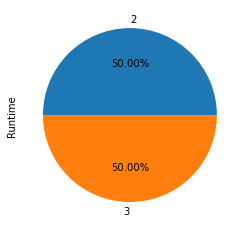

In [13]:
df.runtime.sort_values()[:10].value_counts().plot(kind='pie',label = 'Runtime',autopct='%1.2f%%');

**Drop duplicates**

In [14]:
df = df.drop(df[df.duplicated()].index,axis = 0)
df

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,7.4,1966
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,5.4,1966


In [15]:
df.duplicated().sum()

0

**Drop rows that have missing values**

In [16]:
df = df.dropna()

**Function for getting values from columns by splitting**

In [17]:
def splitting(col_name):
    df2 = col_name.str.cat(sep='|')
    df2 = pd.Series(df2.split('|'))
    df2 = df2.value_counts(ascending=False)
    return df2

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (What are the most used genres according to our dataset?)

**Get genres by splitting genres column**

In [18]:
df2 = splitting(df["genres"])
df2

Drama              3932
Comedy             3048
Thriller           2461
Action             2021
Romance            1414
Horror             1337
Adventure          1270
Crime              1200
Science Fiction    1028
Family              946
Fantasy             762
Mystery             702
Animation           512
Music               308
History             287
Documentary         268
War                 235
Western             154
TV Movie            114
Foreign              90
dtype: int64

**Plotting the most used genres**

Text(0.5, 1.0, 'The Most genres of Movies')

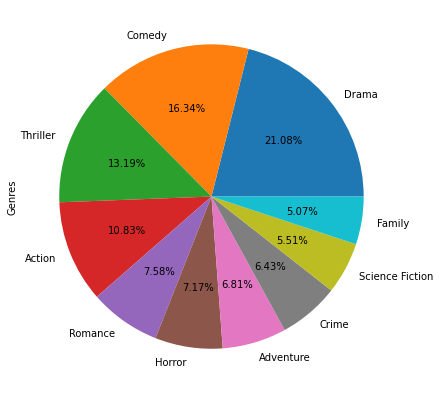

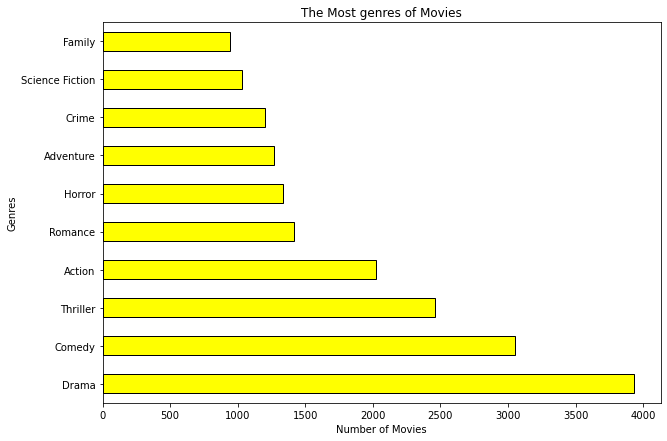

In [19]:
plt.figure(figsize=(10,7))
df2.head(10).plot(kind='pie',label = 'Genres',autopct='%1.2f%%')
plt.figure(figsize=(10,7))
df2.head(10).plot.barh(color = 'yellow', edgecolor='black', linewidth=1)
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.title('The Most genres of Movies')

**Drama is the most popular genre followed by Comedy and thriller**

### Research Question 2  (Who are the cast members that have the most involvements in movies in our dataset?)

**Get cast names by splitting genres column**

In [20]:
df3 = splitting(df["cast"])
df3

Robert De Niro       68
Samuel L. Jackson    65
Bruce Willis         61
Nicolas Cage         59
Michael Caine        50
                     ..
Lauren Collins        1
Sean Marquette        1
Brian Salzberg        1
Madison Riley         1
Glen-Paul Waru        1
Length: 15316, dtype: int64

**Plotting the cast members that have the most involvements in movies**

Text(0.5, 1.0, 'The cast members that have the most involvements in movies')

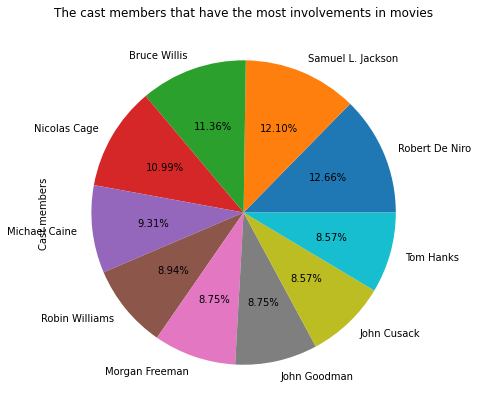

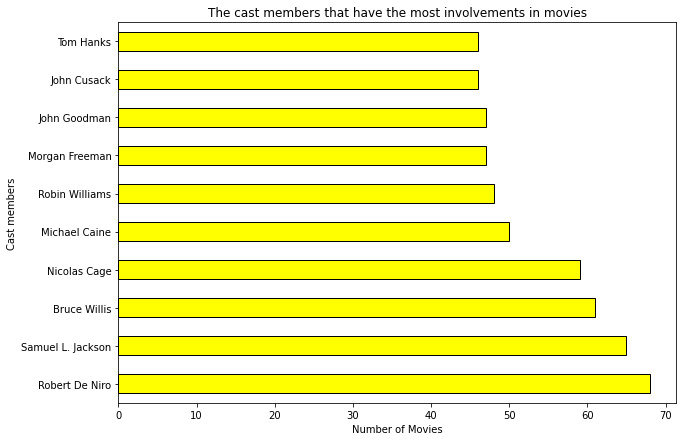

In [21]:
plt.figure(figsize=(10,7))
df3.head(10).plot(kind='pie',label = "Cast members" , title = 'The cast members that have the most involvements in movies',autopct='%1.2f%%')
plt.figure(figsize=(10,7))
df3.head(10).plot.barh(color = 'yellow', edgecolor='black', linewidth=1)
plt.xlabel('Number of Movies')
plt.ylabel('Cast members')
plt.title('The cast members that have the most involvements in movies')

**Robert De Niro is the most cast member that have the most involvements in movies followed by Samuel Jackson and Bruce Willis**

### Research Question 3  (Who are the directors that have the most involvements in movies in our dataset?)

In [22]:
df4 = df["director"].value_counts(ascending=False)
df4

Woody Allen         40
Clint Eastwood      33
Steven Spielberg    29
Martin Scorsese     26
Ridley Scott        23
                    ..
Joachim Trier        1
Giulio De Santi      1
Mauro Lima           1
Hart Bochner         1
Roger Vadim          1
Name: director, Length: 3947, dtype: int64

**Plotting the directors that have the most involvements in movies**

Text(0.5, 1.0, 'The directors that have the most involvements in movies')

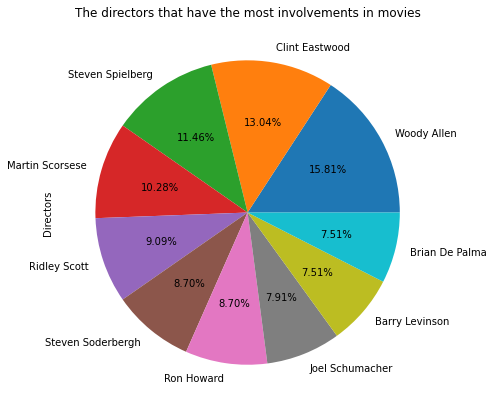

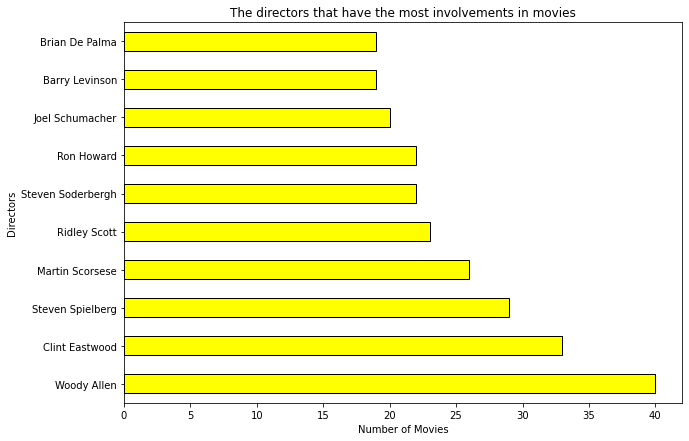

In [23]:
plt.figure(figsize=(10,7))
df4.head(10).plot(kind='pie',label = 'Directors',title = 'The directors that have the most involvements in movies',autopct='%1.2f%%')
plt.figure(figsize=(10,7))
df4.head(10).plot.barh(color = 'yellow', edgecolor='black', linewidth=1)
plt.xlabel('Number of Movies')
plt.ylabel('Directors')
plt.title('The directors that have the most involvements in movies')

**Woody Allen is the director that have the most involvements in movies followed by Clint Eastwood and Steven Spielberg**

### Research Question 4 (What are the movies that have the highest profits in 2015?)

**Filter dataset to get all movies that released on 2015 only then create profit column**

In [24]:
df_2015 = df[df['release_year'] == 2015]

In [25]:
df_2015['profit'] = df_2015['revenue'] - df_2015['budget']

<ipython-input-25-b816ded84c94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['profit'] = df_2015['revenue'] - df_2015['budget']


In [26]:
df_2015 = df_2015.sort_values(by='profit', ascending=False)

In [27]:
xx = np.array(df_2015['profit'].head(10))
yy = np.array(df_2015['original_title'].head(10))

**Plotting the movies that have the highest profits in 2015**

<Figure size 720x504 with 0 Axes>

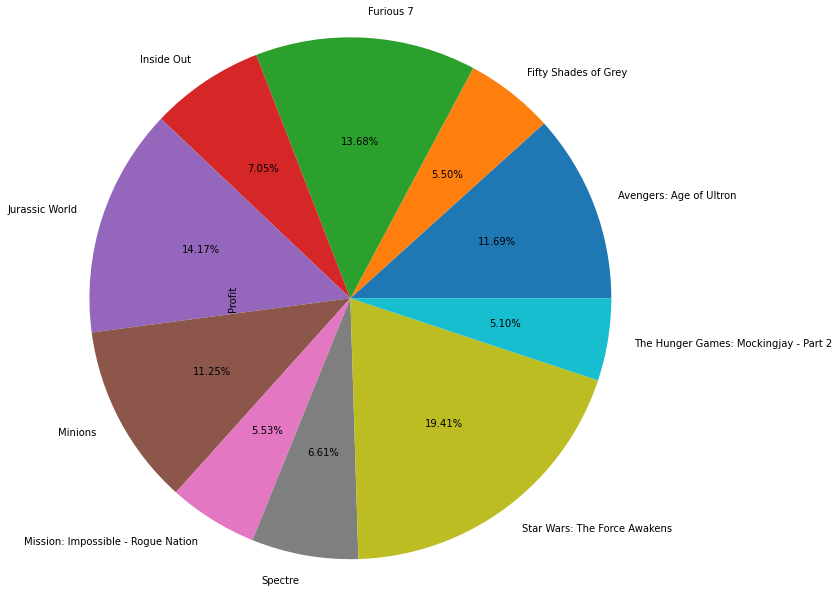

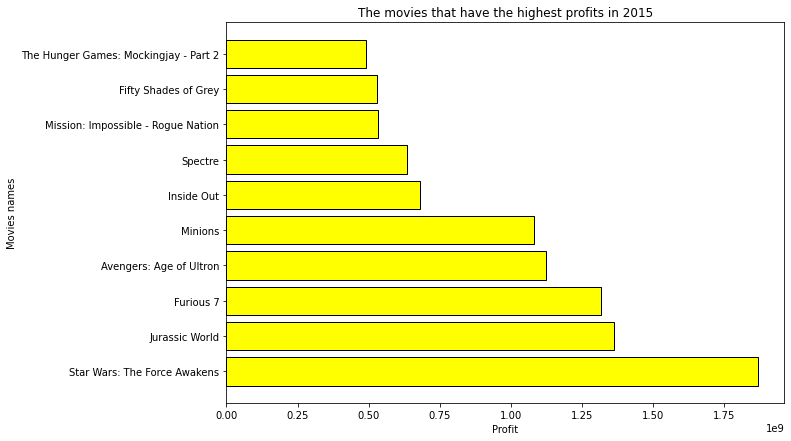

In [28]:
plt.figure(figsize=(10,7))
df_2015.head(10).groupby(df_2015['original_title']).sum().plot(kind='pie', y='profit',label = 'Profit',autopct='%1.2f%%', radius = 3).get_legend().remove()
plt.figure(figsize=(10,7))
plt.barh(yy,xx,color = 'yellow', edgecolor='black', linewidth=1);
plt.xlabel('Profit');
plt.ylabel('Movies names');
plt.title('The movies that have the highest profits in 2015');

**Stars wars: the force awaknes is the movie that have the highest profit in 2015 followed by Jurrasic world and Furious 7**

## Conclusions

### Q1:
- From the pie chart and the bar chart we can see , Drama is the most popular genre

- **Limitations :** 
    The data in the column genres is sperated by '|', so I needed a way which will take any value in the column from which data is need to be extracted and keep track of count takeing a given column, and separate the string by '|'
    
## Q2:
- From the pie chart and the bar chart we can see , Roberto De Niro is the most cast member to involve in movies 

- **Limitations :** 
    The data in the column cast is sperated by '|', so I needed a way which will take any value in the column from which data is need to be extracted and keep track of count takeing a given column, and separate the string by '|'
    
## Q3:
- From the pie chart and the bar chart we can see , Woody Allen is the most director to direct movies 

- **Limitations :** 
    The data contain missing values that i need to drop them first, then sort director column descendingly according to number of movies they directed 
    
## Q4:
- From the pie chart and the bar chart we can see , Stars wars: the force awaknes is the movie that have the highest profit in 2015 

- **Limitations :** 
    I need to filter the data to make all movies in dataset released on 2015 , then i found that there is no profit column that i create it using revenue and budget columns 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1